<a href="https://colab.research.google.com/github/joanby/tensorflow2/blob/master/Colab%204%20-%20Construir%20una%20Red%20Neuronal%20Convolucional%20con%20TensorFlow%202.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

## Paso 2: Importar las librerías necesarias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.3.0'

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [2]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [3]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Normalización de las imágenes

In [4]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test / 255.0

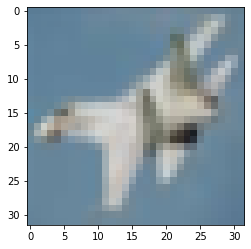

In [7]:
plt.imshow(X_test[10])

In [8]:
y_test[10]

array([0], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [9]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [10]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [15]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening

In [16]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [17]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [18]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [21]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3594 - sparse_categorical_accuracy: 0.5103
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9141 - sparse_categorical_accuracy: 0.6783
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7495 - sparse_categorical_accuracy: 0.7367
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6330 - sparse_categorical_accuracy: 0.7792
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5427 - sparse_categorical_accuracy: 0.8093


### Evaluar el modelo

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.7642 - sparse_categorical_accuracy: 0.7530


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.753000020980835
